In [1]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

from hydrad_tools.configure import Configure
from hydrad_tools.parse import Strand, Profile
from hydrad_tools.visualize import animate_strand

from IPython.display import HTML

%matplotlib inline

/Users/willbarnes/anaconda/envs/spectral-signatures-tne/lib/python3.8/site-packages/hydrad_tools/configure/configure.py:20: UserWarning: GitPython not installed. Cannot clone HYDRAD from GitHub.
  warnings.warn('GitPython not installed. Cannot clone HYDRAD from GitHub.')


In [2]:
base_config = Configure.load_config('/Users/willbarnes/Documents/work/codes/hydrad_tools/defaults.asdf')

In [3]:
base_config['general']['loop_length'] = 90*u.Mm
base_config['general']['total_time'] = 1*u.h
base_config['initial_conditions']['heating_location'] = 45*u.Mm
base_config['initial_conditions']['heating_scale_height'] = 1e300*u.Mm
base_config['heating']['beam'] = [
    {'time_start':10*u.s,
     'flux':5e10*u.erg/(u.cm**2 * u.s),
     'cut_off':15*u.keV,
     'index':5,},
]
base_config['grid']['adaptive_every_n_time_steps'] = 1
base_config['grid']['maximum_refinement_level'] = 13

In [4]:
c = Configure(base_config)

In [5]:
c.config

{'asdf_library': {'author': 'Space Telescope Science Institute',
  'homepage': 'http://github.com/spacetelescope/asdf',
  'name': 'asdf',
  'version': '2.0.1'},
 'history': {'extensions': [<asdf.tags.core.ExtensionMetadata at 0x1178b8a90>,
   <asdf.tags.core.ExtensionMetadata at 0x117851b50>]},
 'general': {'footpoint_height': <Quantity 5.e+08 cm>,
  'loop_inclination': <Quantity 0. deg>,
  'force_single_fluid': False,
  'heat_flux_timestep_limit': <Quantity 1.e-10 s>,
  'logging_frequency': 1000,
  'minimum_collisional_coupling_timescale': <Quantity 0.01 s>,
  'output_interval': <Quantity 1. s>,
  'heat_flux_limiting_coefficient': 0.167,
  'use_kinetic_model': False,
  'write_file_equation_terms': False,
  'write_file_hydrogen_level_populations': False,
  'write_file_ion_populations': False,
  'write_file_physical': True,
  'write_file_timescales': False,
  'loop_length': <Quantity 90. Mm>,
  'total_time': <Quantity 1. h>},
 'grid': {'adapt': True,
  'adapt_every_n_time_steps': 10,
  

In [6]:
!rm -rf /Users/willbarnes/Desktop/beam_test/

In [7]:
c.setup_simulation('/Users/willbarnes/Desktop/',
                   base_path='/Users/willbarnes/Documents/work/codes/HYDRAD/',
                   name='beam_test',
                   verbose=False)

In [8]:
s = Strand('/Users/willbarnes/Desktop/beam_test/')

In [9]:
s.time

<Quantity [ 0.     ,  1.00069,  2.00036,  3.0002 ,  4.00075,  5.00165,
            6.00037,  7.00035,  8.00123,  9.00112, 10.0009 , 11.0003 ,
           12.0004 , 13.0005 , 14.0002 , 15.0001 , 16.0014 , 17.0005 ,
           18.0004 , 19.0011 , 20.001  , 21.0006 , 22.     , 23.0008 ,
           24.     , 25.0013 , 26.0002 , 27.0015 , 28.0007 , 29.0005 ,
           30.001  , 31.001  , 32.0008 , 33.0006 , 34.0001 , 35.0002 ,
           36.0004 , 37.0007 , 38.0007 , 39.0019 , 40.0012 , 41.0004 ,
           42.0021 , 43.0009 , 44.0007 , 45.0013 , 46.0011 , 47.0008 ,
           48.0013 , 49.0003 , 50.0002 , 51.0011 , 52.0017 , 53.0015 ,
           54.0004 , 55.0002 , 56.0009 , 57.0003 , 58.0005 , 59.0001 ,
           60.0013 , 61.001  , 62.001  , 63.0002 , 64.0011 , 65.0007 ,
           66.0013 , 67.0008 , 68.0014 , 69.0003 , 70.0012 , 71.0014 ,
           72.0003 , 73.0005 , 74.0001 , 75.0013 , 76.0009 , 77.0002 ,
           78.0005 , 79.0001 , 80.0014 , 81.0012 , 82.0001 , 83.0011 ,
      

In [10]:
s[2:]

HYDrodynamics and RADiation (HYDRAD) Code
-----------------------------------------
Results path: /Users/willbarnes/Desktop/beam_test/
Time interval: [2.00036 s, 87.0004 s]
Number of profiles: 86
Loop length: 90.000 Mm

In [11]:
s.time[10:12]

<Quantity [10.0009, 11.0003] s>

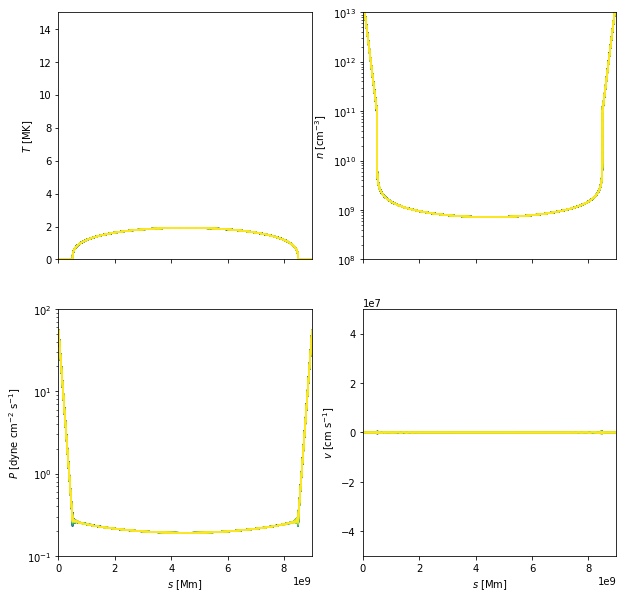

In [12]:
s.peek(step=1)

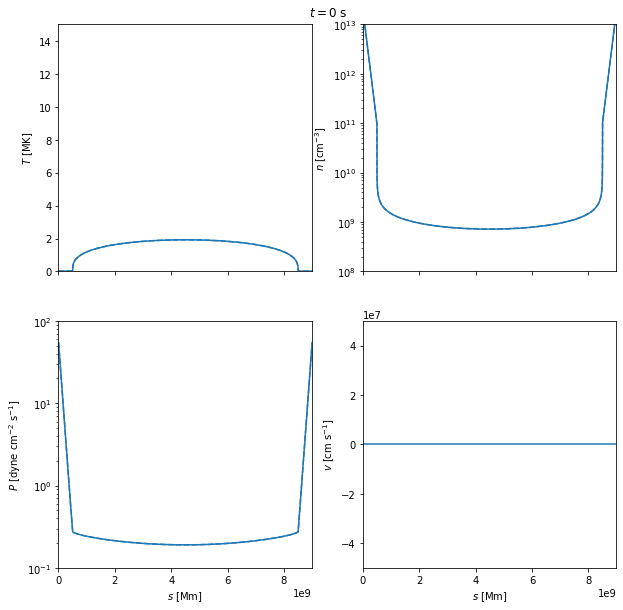

In [19]:
ani = animate_strand(s, stop=100,step=1)

In [20]:
HTML(ani.to_jshtml())